# An analysis of paleo-present climate data

A recent New York Times article has the headline "Global Fossil Fuel Emissions Are Rising, Report Finds". An report from the UN climate summit notes that "The planet is already about 1.2 degrees Celsius warmer now than it was from 1850 to 1990. Given current temperature and emissions trends, the world has about seven years before it uses up its “carbon budget,” or becomes more than 50 percent likely to surpass a temperature rise of 1.5 degrees" [1] 

With this assignment we are tasked to analyse CO2 rates verses the global rise in temperature over the last 800,000 years. We are able to utilise data obtained from ice core samples taken in Antartica. The data is extracted from the air bubbles that were formed within the ice over the millenia, these samples contain the CO2, amongst other gases, that were analysed to allow scientists to collect the data [2]. 

In [1]:
#importing standard libraries to use in the tasks
#Numerical arrays and random numbers
import numpy as np
#plotting charts
import matplotlib.pyplot as plt
#to use datasets
import pandas as pd
#for graphing
import seaborn as sns
#manipulating spreadsheet data
import csv
#import seaborn for linear regression
import seaborn as sns

**CO2 data**

"The overwhelming realization that anthropogenic climate change is a reality has focused the attention of the scientific community, policymakers and the general public on the rising atmospheric concentrations of the main greenhouse gases, carbon dioxide (CO2), methane (CH4), and nitrous oxide (N2O). The Global Carbon Project (GCP) has approached this challenge by focusing comprehensively on the global biogeochemical cycles which govern these three greenhouse gases, including their natural and human drivers, and opportunities for low carbon pathways."[3] 

The data we will be using, was taken from samples of ice drilled out of the survey base known as Dome C (or Concordia), as shown on the map below.[4]

![Dome C location](http://climatewarmingcentral.com/images/antarctic_detail.jpg)


In this section, we will pull in data from sources on the internet. We will be manipulating it to allow us to use the data in python. This will allow us to explore the data and to graph it to be able to show if there are any differences in the various data sources. We will be using data from Luthi et al [21] and Jouzel et al [20].
Items to note from the readme section of the Breitler IPCC data, the age unit data is listed as years before present (yr BP) where present was the year 1950, this means there is a gap in the data from 1950 to today. The document also refers us to NOAA/Mauna Loa record for the latest anthropogenic data to help us fill this gap. [5] 


We start by reading the data from the file using sheet 1 (all records). We skip the first 6 rows as they contain information about the data. The spreadsheet in this section was originally named IPCC paper grl52461-sup-0003-supplementary [6]. It is renamed for ease of use in this assignment. 

In [2]:
df_all_records = pd.read_excel('data/CO2 data.xlsx', sheet_name=1, skiprows=6)
df_all_records.head()

,Depth (m),"Gasage (EDC3, yr BP)","Gasage (AICC2012, yr BP)",CO2 (ppmv),sigma mean CO2 (ppmv),Depth (m).1,"Gasage (EDC3, yr BP).1","Gasage (AICC2012, yr BP).1",CO2 (ppmv).1,Depth (m).2,...,"Gasage (WDC06A-7, yr BP).1",CO2 (ppmv).19,sigma mean CO2 (ppmv).16,Depth (m).19,"Gasage (AICC2012, yr BP).13",corrected CO2 (ppmv),analytical sigma mean CO2 (ppmv),Correcting Factor (ppmv),lower bound (2 sigma) of correction F. (ppmv),upper bound (2 sigma) of correction F. (ppmv)
0,102.83,137.0,350.110103,280.4,1.8,149.1,2690.0,NaN,284.7,380.82,...,8893.213,267.902828,3.369565,2950.5275,562654.671212,234.065089,0.938515,0.0,0.0,0.45076
1,106.89,268.0,486.693200,274.9,0.7,173.1,3897.0,3661.9285,272.7,382.42,...,8985.488,265.447325,1.429392,2951.8225,563135.783333,240.114724,2.126252,0.0,0.0,0.49078
2,107.20,279.0,501.195000,277.9,0.7,177.4,4124.0,3746.6270,268.1,382.76,...,9080.986,268.861214,1.418332,2952.9225,563536.650000,242.288114,0.513847,0.0,0.0,0.52478
3,110.25,395.0,539.649455,279.1,1.3,228.6,6735.0,6449.1760,262.2,383.54,...,9176.945,263.952432,1.853741,2954.0225,563928.766667,245.694323,1.769919,0.0,0.0,0.55879
4,110.50,404.0,539.894909,281.9,1.1,250.3,7873.0,7567.3510,254.5,385.33,...,9274.864,270.597511,3.848356,2955.1225,564311.433333,245.812943,0.493195,0.0,0.0,0.59281


In [3]:
#get two columns from the dataframe [7] 
columns = ['Gasage (AICC2012, yr BP)', 'CO2 (ppmv)']
df_aicc2012 = pd.DataFrame(df_all_records, columns=columns)
df_aicc2012.head()

,"Gasage (AICC2012, yr BP)",CO2 (ppmv)
0,350.110103,280.4
1,486.693200,274.9
2,501.195000,277.9
3,539.649455,279.1
4,539.894909,281.9


Now we can also read in the data from the file using sheet 2 (CO2 Composite). We skip the first 14 rows as they contain information about the data

In [4]:
df_CO2_composite = pd.read_excel('data/CO2 data.xlsx', sheet_name=2, skiprows=14)
df_CO2_composite.drop('sigma mean CO2 (ppmv)', axis=1, inplace=True)
df_CO2_composite.head()

,Gasage (yr BP),CO2 (ppmv)
0,-51.030000,368.022488
1,-48.000000,361.780737
2,-46.279272,359.647793
3,-44.405642,357.106740
4,-43.080000,353.946685


Using just the composite data, we start by renaming the headers of the columns in the dataframe, this is for ease of further work, and also, as the Gasage column header has an annoying trailing space which is easily missed. This will help to make all the headers easier to view.

In [5]:
df_CO2_composite.rename(columns={'Gasage (yr BP) ': 'Gasage', 'CO2 (ppmv)': 'CO2'}, inplace=True)
df_CO2_composite.head()
#df_CO2_composite.tail()

,Gasage,CO2
0,-51.030000,368.022488
1,-48.000000,361.780737
2,-46.279272,359.647793
3,-44.405642,357.106740
4,-43.080000,353.946685


In [6]:
df_mauna = pd.read_csv('data/co2_mauna.txt', sep='\s+', skiprows=45) # skip the header row as it has a # symbol at the start
df_mauna.set_axis(["Gasage", "CO2", "unc"], axis=1,inplace=True) # give the columns header names
df_mauna.drop('unc', axis=1, inplace=True)
#df_mauna = df_mauna.dropna()
df_mauna.head()
#df_mauna.describe()

,Gasage,CO2
0,1960,316.91
1,1961,317.64
2,1962,318.45
3,1963,318.99
4,1964,319.62


Now we have the data, we need to change the year to the BP format with 1950 as the reference

In [7]:
df_mauna.eval("Gasage = Gasage - 1950", inplace=True) # [9] 
df_mauna.head()
#df_mauna.tail()


,Gasage,CO2
0,10,316.91
1,11,317.64
2,12,318.45
3,13,318.99
4,14,319.62


We need to invert the data for the CO2 dataframe to allow us to add the Mauna Lua data

In [8]:

#inverting the data in the dataframe [10]
df_CO2_composite["Gasage"] = df_CO2_composite["Gasage"].values[::-1]
df_CO2_composite["CO2"] = df_CO2_composite["CO2"].values[::-1]
df_CO2_composite

,Gasage,CO2
0,805668.868405,207.285440
1,805132.442334,202.226839
2,804522.674630,204.861938
3,804009.870607,207.498645
4,803925.284376,202.921723
...,...,...
1896,-43.080000,353.946685
1897,-44.405642,357.106740
1898,-46.279272,359.647793
1899,-48.000000,361.780737


add mauna data to the bottom of co2 composite data

In [9]:
df_co2_appended = pd.concat([df_CO2_composite, df_mauna], ignore_index=True)
df_co2_appended

,Gasage,CO2
0,805668.868405,207.285440
1,805132.442334,202.226839
2,804522.674630,204.861938
3,804009.870607,207.498645
4,803925.284376,202.921723
...,...,...
1960,69.000000,411.650000
1961,70.000000,414.210000
1962,71.000000,416.410000
1963,72.000000,418.530000


print plot

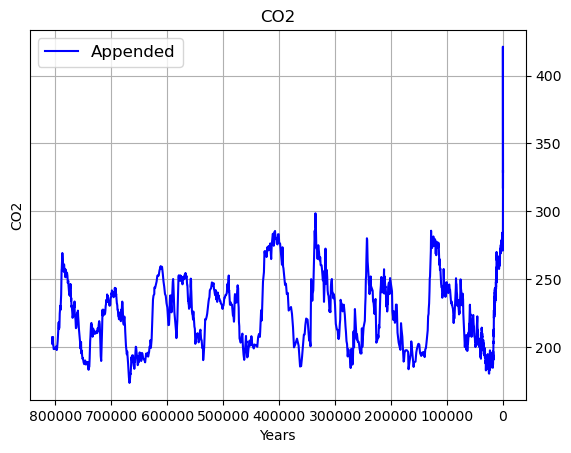

In [10]:
fig, ax = plt.subplots()
df_co2_appended.plot(x = "Gasage", y = "CO2", ax=ax, label='Appended',color='blue')
#df_aicc2012.plot(x = "Gasage (AICC2012, yr BP)", y = "CO2 (ppmv)", ax=ax, label='aicc',color='green')
ax.yaxis.tick_right()
ax.invert_xaxis() 
ax.legend(loc='upper left', fontsize=12)
plt.title("CO2")
plt.xlabel("Years")
plt.ylabel("CO2")
plt.grid(True)
plt.savefig('img/CO2_appended.png') 
plt.show()

We can now see that over the course of 800,000 years, the CO2 content of the atmosphere has stayed below 300ppm. Having a look at the graph we see it has risen and dropped again regularly averaging out at around 230ppm. Unfortunately, the increase/decrease cycle has stopped and it is clearly on an upward trend, currently over 400 ppm. This leads us to conclude that CO2 as a greenhouse gas has increased due to other than natural phenomena. This information points to the time of the industrial revolution and increased requirements for travel, heat and manufacturing, but would need further investigation.

**Temperature data**

The next step is to investigate the data for temperature

In [11]:
df_temperature = pd.read_excel('data/Temp data.xls')

df_temperature.head()

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453


In [12]:
df_temperature.tail()

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
5814,5815,3197.70,816871.6,817562.0,-432.2,211.0,1.529
5815,5816,3198.25,817693.6,818631.0,-431.4,211.2,1.548
5816,5817,3198.80,818505.5,819700.0,-430.3,211.3,1.576
5817,5818,3199.35,819303.1,820769.0,-429.8,211.4,1.589
5818,5819,3199.90,820093.9,821838.0,-430.0,211.4,1.583


In [13]:
# read in temperature data from Dome C text file. Using the separator s+ to ensure correct spacing as there is more than one whitespace
# and skiprows to ignore the first 91 lines of text. [11] 
df_domeC_Temp = pd.read_csv('data/domeC.txt', sep='\s+', skiprows=91)
df_domeC_Temp.describe()


,Bag,ztop,Age,Deuterium,Temperature
count,5800.000000,5800.000000,5800.000000,5788.000000,5785.000000
mean,2900.500000,1594.725000,190016.390617,-417.579610,-4.580228
std,1674.460112,920.953062,192546.207239,20.359332,3.446971
min,1.000000,0.000000,-50.000000,-449.500000,-10.580000
25%,1450.750000,797.362500,46330.569350,-432.500000,-7.450000
50%,2900.500000,1594.725000,121793.340000,-421.300000,-5.200000
75%,4350.250000,2392.087500,272456.740000,-403.200000,-1.820000
max,5800.000000,3189.450000,801662.000000,0.950000,5.460000


In [14]:
# Remove 3 columns of data that isn't relevant
df_domeC_Temp=df_domeC_Temp.drop(["Bag","ztop","Deuterium"],axis=1) #[12]
# remove cells with NaN - not a number 
df_domeC_Temp=df_domeC_Temp.dropna() # [13]
df_domeC_Temp.head()


,Age,Temperature
12,38.37379,0.88
13,46.81203,1.84
14,55.05624,3.04
15,64.41511,0.35
16,73.15077,-0.42


In [15]:
#The index is now starting at 12 instead of 0, we can reset it [14]
df_domeC_Temp = df_domeC_Temp.reset_index(drop=True) 
df_domeC_Temp.head()

,Age,Temperature
0,38.37379,0.88
1,46.81203,1.84
2,55.05624,3.04
3,64.41511,0.35
4,73.15077,-0.42


In [16]:
df_domeC_Temp.tail()

,Age,Temperature
5780,797408.0,-8.73
5781,798443.0,-8.54
5782,799501.0,-8.88
5783,800589.0,-8.92
5784,801662.0,-8.82


In [17]:
df_domeC_Temp.to_csv('data/domeC.csv', index = None)

We have the data ready to plot. In the first graph, we see the temperature verses the CO2 data. It is not immediately obvious of any correlation due to the different scaling.

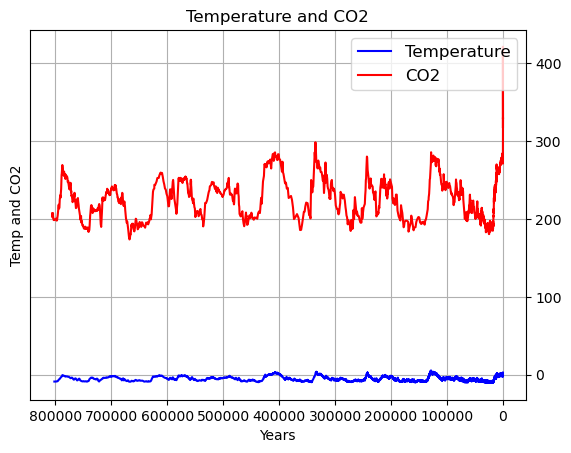

In [18]:
fig, ax = plt.subplots()
df_domeC_Temp.plot(x = "Age", y = "Temperature", ax=ax, label='Temperature',color='blue')
df_co2_appended.plot(x = "Gasage", y = "CO2", ax=ax, label='CO2',color='red')
ax.yaxis.tick_right()
ax.invert_xaxis() 
ax.legend(loc='upper right', fontsize=12)
plt.title("Temperature and CO2")
plt.xlabel("Years")
plt.ylabel("Temp and CO2")
plt.grid(True)
plt.savefig('img/Temperature and CO2.png') 
plt.show()

In the next plot, we can see the temperature at a better scale. If the data is correct, there was a significant rise about 120,000 years ago.

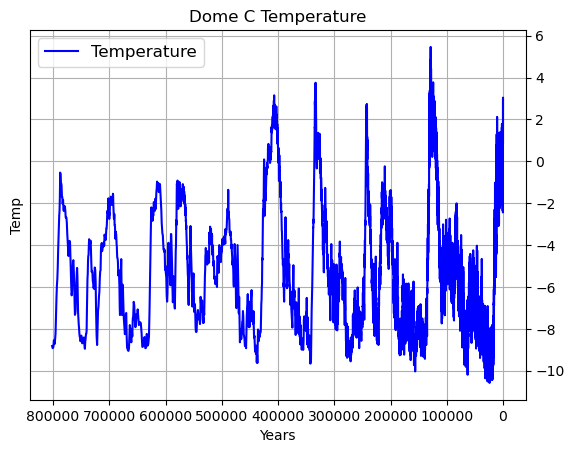

In [19]:
fig, ax = plt.subplots()
df_domeC_Temp.plot(x = "Age", y = "Temperature", ax=ax, label='Temperature',color='blue')
#df_aicc2012.plot(x = "Gasage (AICC2012, yr BP)", y = "CO2 (ppmv)", ax=ax, label='aicc',color='green')
ax.yaxis.tick_right()
ax.invert_xaxis() 
ax.legend(loc='upper left', fontsize=12)
plt.title("Dome C Temperature")
plt.xlabel("Years")
plt.ylabel("Temp")
plt.grid(True)
plt.savefig('img/Temperature.png') 
plt.show()

To get a better image of the CO2 and the temperature over the 800,000 years, we can plot on a two axis graph and overlay the data. We can see the COs2 and the temperature follow each other but wiht a large spike in the CO2 in the present day. [15] 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


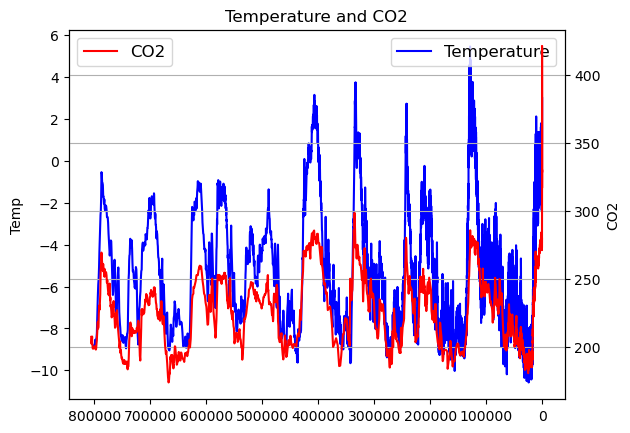

In [20]:
fig, ax1 = plt.subplots()
df_domeC_Temp.plot(x = "Age", y = "Temperature", ax=ax, label='Temperature',color='blue')
df_co2_appended.plot(x = "Gasage", y = "CO2", ax=ax, label='CO2',color='red')
ax1.yaxis.tick_right()
ax1.invert_xaxis() 
ax1.legend(loc='upper right', fontsize=12)
ax1.plot(df_domeC_Temp["Age"], df_domeC_Temp["Temperature"], label='Temperature',color='blue' )
ax1.set_ylabel('Temp')

ax2 = ax1.twinx()
ax2.plot(df_co2_appended["Gasage"], df_co2_appended["CO2"], label='CO2',color='red' )
ax2.set_ylabel('CO2')
ax1.legend(loc='upper right', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)
plt.title("Temperature and CO2")
plt.xlabel("Years")
plt.grid(True)
plt.savefig('img/Temperature and CO2b.png') 
plt.show()

As part of the assignment, we are asked to export the data to JSON and CSV formats 

In [21]:
df_co2_appended.to_json('data/CO2 data.json', orient = 'split', compression = 'infer', index = 'true') # [16] 
df_co2_appended.to_csv('data/CO2_data_appended.csv', index = 'false')

# Methane data
In this section, we shall take a look at the methane data for a similar timespan against the temperature. In recent years, farmers have been targetted to reduce the amount of methane (CH4) being produce by livestock on their land, the reality is that it is more than just livestock creating the methane.


In [22]:
df_methane = pd.read_csv('data/methane.csv', skiprows=7) #[17]
df_methane.set_axis(["Gasage", "dome_c", "law_dome", "cape_grim", "mauna", "shetland"], axis=1,inplace=True)
df_methane=df_methane.drop(["law_dome", "cape_grim", "mauna", "shetland"],axis=1) 
df_methane["Gasage"] = df_methane["Gasage"].apply(pd.to_numeric, errors='coerce') # the gasage column is made up of object type strings, need them to be a number for next step [18] 
df_methane['Gasage']=df_methane['Gasage'].abs() # need to make the gasage numbers positive for the plot [19] 
df_methane

,Gasage,dome_c
0,797446.1,399.30
1,796467.4,457.80
2,795327.0,396.10
3,794369.7,418.00
4,792988.0,428.30
...,...,...
2208,2017.0,1798.62
2209,2018.0,1810.81
2210,2019.0,1816.61
2211,2020.0,1824.70


We can now plot the methane against the temperature values. As with the CO2, we can see the methane values follow the temperature trends.

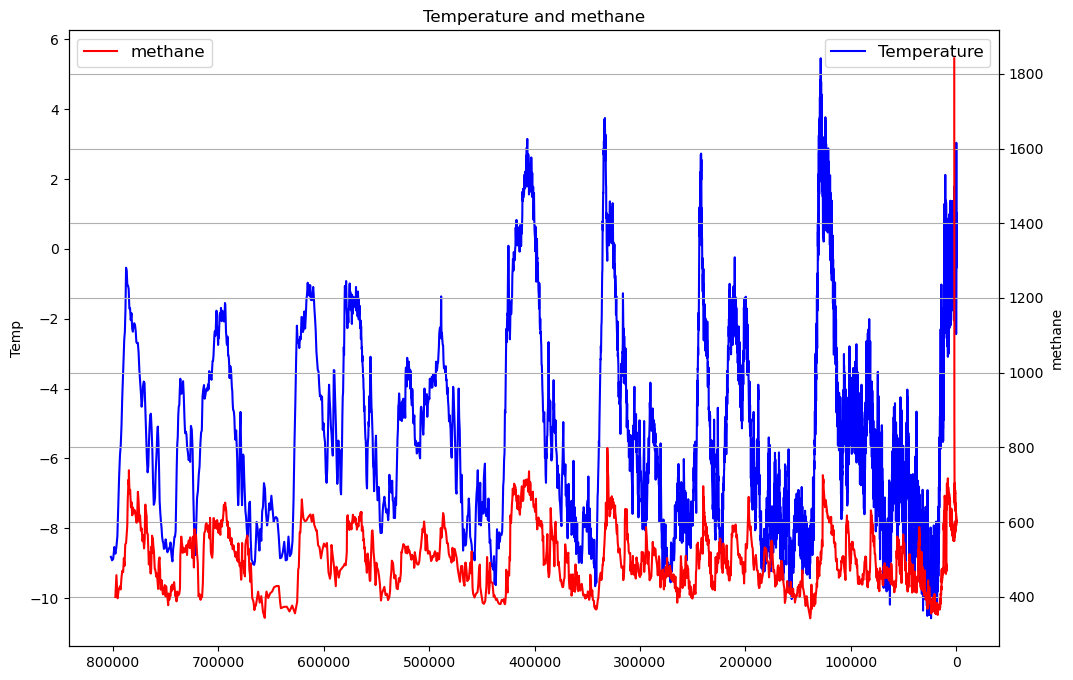

In [29]:
fig, ax1 = plt.subplots(figsize= (12, 8))
df_domeC_Temp.plot(x = "Age", y = "Temperature", ax=ax, label='Temperature',color='blue')
df_methane.plot(x = "Gasage", y = "dome_c", ax=ax, label='methane',color='red')
ax1.yaxis.tick_right()
ax1.invert_xaxis() 
ax1.plot(df_domeC_Temp["Age"], df_domeC_Temp["Temperature"], label='Temperature',color='blue')
ax1.legend(loc='upper right', fontsize=12)
ax1.set_ylabel('Temp')

ax2 = ax1.twinx()
ax2.plot(df_methane["Gasage"], df_methane["dome_c"], label='methane',color='red')
ax2.set_ylabel('methane')
ax2.legend(loc='upper left', fontsize=12)
plt.title("Temperature and methane")
plt.xlabel("Years")
plt.grid(True)
plt.savefig('img/Temperature and methane.png') 
plt.show()

# Irish Weather

In [24]:
df_snn_temp = pd.read_csv('data/shannon.csv', skiprows=19) #[xx]
df_snn_rain = pd.read_csv('data/shannon.csv', skiprows=19)
#df_methane.set_axis(["Gasage", "dome_c", "law_dome", "cape_grim", "mauna", "shetland"], axis=1,inplace=True)
#df_methane=df_methane.drop(["law_dome", "cape_grim", "mauna", "shetland"],axis=1) 
df_snn_temp

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,1945,9,15.0,23.3,5.4,18.4,11.6,61.8,0.9,10.5,56,109.5
1,1945,10,12.4,18.8,4.3,15.9,8.9,94.3,1.6,10.6,54,104.7
2,1945,11,8.2,15.5,-3.6,11.5,5.0,42.7,-6.0,8.4,36,56.7
3,1945,12,7.4,13.2,-0.9,10.2,4.7,120.2,-4.0,10.5,47,43.2
4,1946,1,5.7,11.6,-5.2,8.6,2.8,103.8,-8.9,12.8,64,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...
934,2023,7,15.7,21.9,9.1,18.5,12.9,155.0,7.0,9.8,38,136.6
935,2023,8,16.3,26.6,9.4,19.5,13.1,70.5,6.9,8.4,42,142.5
936,2023,9,15.6,27.4,5.0,19.5,11.8,113.8,2.6,7.6,45,136.1
937,2023,10,11.9,21.5,0.8,15.1,8.7,137.8,-1.2,6.4,31,86.8


We will look at the plots for temperature and rainfall for the Shannon airport observatory

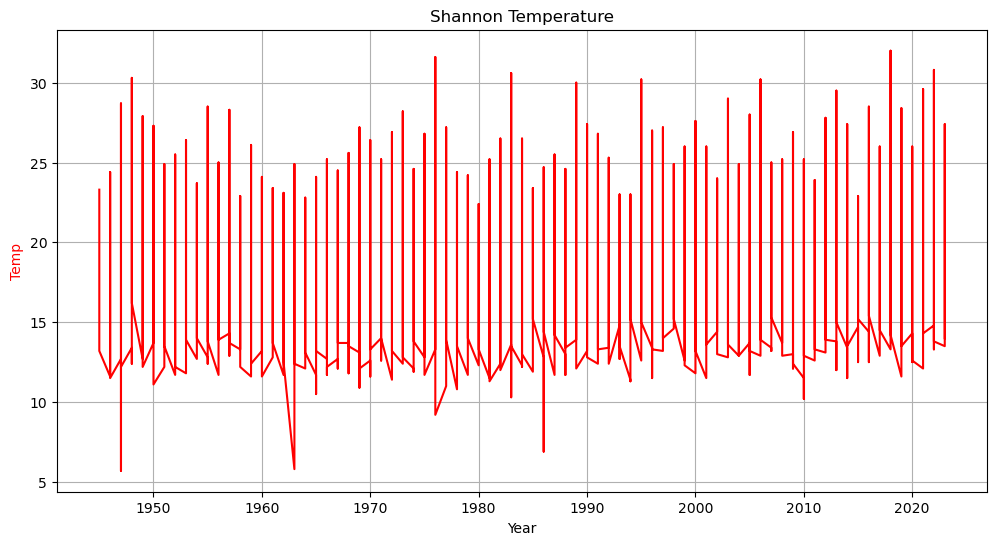

In [25]:
fig, ax = plt.subplots(figsize= (12, 6))
ax.plot(df_snn_temp["year"], df_snn_temp["maxtp"], label='Temperature',color='red')
ax.set_xlabel('Year', fontsize = 10)
ax.set_ylabel('Temp', color="red", fontsize = 10)
plt.title("Shannon Temperature")
plt.grid(True)
plt.show()

If we observe the trend, there is an increase in the overall temperature since 2017 around the Shannon airport area, we can see it is staying above 25 degrees

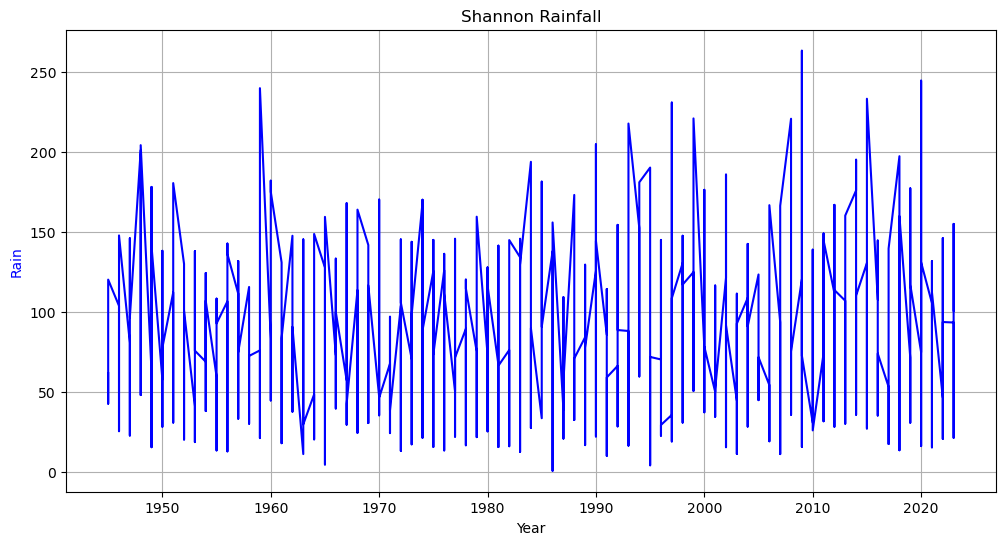

In [26]:
fig, ax = plt.subplots(figsize= (12, 6))
ax.plot(df_snn_temp["year"], df_snn_temp["rain"], label='Rainfall',color='blue')
ax.set_xlabel('Year', fontsize = 10)
ax.set_ylabel('Rain', color="blue", fontsize = 10)
plt.title("Shannon Rainfall")
plt.grid(True)
plt.show()

If we observe the trend for rainfall, there is an increase in the overall rainfall since 2020 around the Shannon airport area, we can see it is dropping back to the seasonal norms, although we seem to be having more flooding around the country. This could be due to other issues such as rivers not being dredged, flood plains being built on, drainage being covered etc.

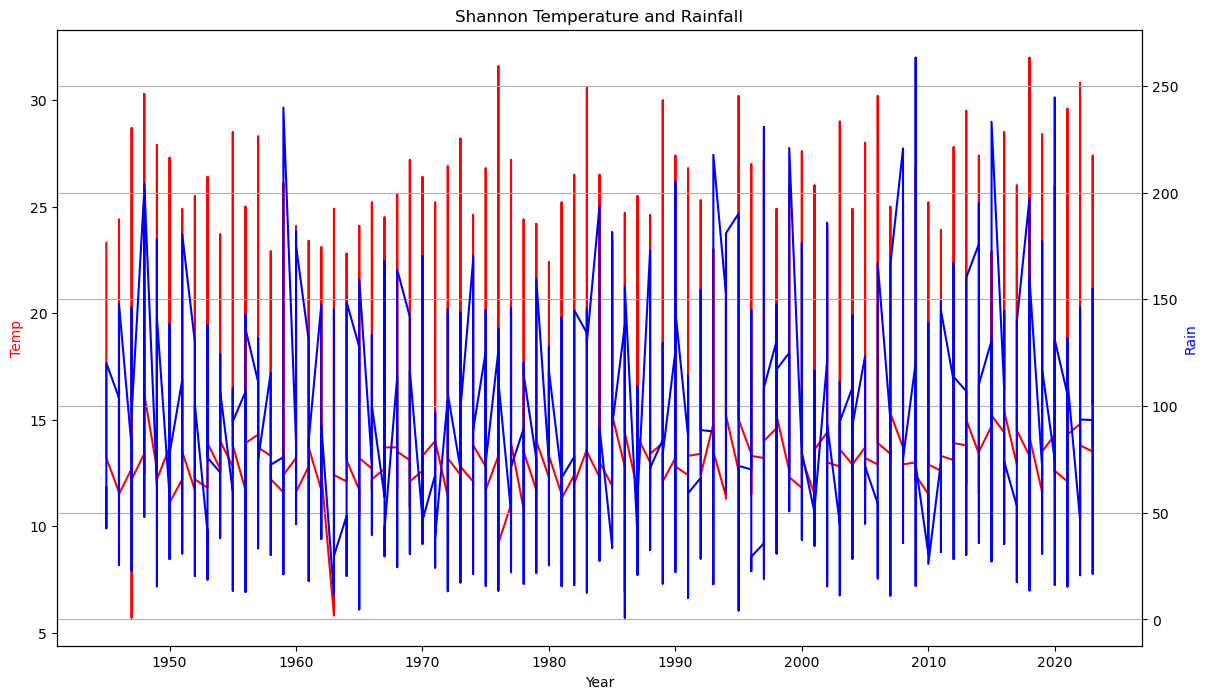

In [27]:
fig, ax = plt.subplots(figsize= (14, 8))
ax.plot(df_snn_temp["year"], df_snn_temp["maxtp"], label='Temperature',color='red' )
ax.set_xlabel('Year', fontsize = 10)
ax.set_ylabel('Temp', color="red", fontsize = 10)
ax2 = ax.twinx()
ax2.plot(df_snn_rain["year"], df_snn_rain["rain"], label='Rain',color='blue' )
ax2.set_ylabel('Rain', color="blue",fontsize=10)
plt.title("Shannon Temperature and Rainfall")
plt.grid(True)
plt.show()
fig.savefig('img/Shannon Temperature and Rainfall.png') 

Plotting temperature against rainfall, we can see that since 2020 we have had increasing rainfall, with a peak and decreasing temperature around the Shannon airport area

# Conclusions

This concludes the analysis of the data for climate. We have looked at the temperature and CO2 changes over 800,000 years and we also looked at another of the greenhouse gases, Methane to see the effect it has had over this timespan. We can see a definite increase in concentration of both gases in the atmosphere. in the recent past to today. Where it was cyclical, it is now on an upward trend. W ehave plotted the data for the Shannon area in Ireland for temperature and Rainfall and we can see increases in the temperature maximum over the last few years.



# References

[1] Erdenesanaa D (2023) Global Fossil Fuel Emissions Are Rising, Report Finds.
 https://www.nytimes.com/2023/12/04/climate/global-fossil-fuel-emissions.html?action=click&pgtype=Article&state=default&module=styln-climate&variant=show%C2%AEion=MAIN_CONTENT_1&block=storyline_levelup_swipe_recirc

[2] Ferguson W (2013) Ice Core Data Help Solve a Global Warming Mystery. https://www.scientificamerican.com/article/ice-core-data-help-solve/

[3] The Global Carbon Project (n.d.) https://www.globalcarbonproject.org/about/index.htm

[4] Climate Central Warming Dome C location (n.d.) http://climatewarmingcentral.com/images/antarctic_detail.jpg

[5] Global Monitoring Laboratory (n.d.) https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.txt.

[6] American Geophysical Union (n.d.) https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1002%2F2014GL061957&file=grl52461-sup-0003-supplementary.xls.

[7] Stack Overflow. (n.d.). Selecting multiple columns in a Pandas dataframe https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe

[8] Stack Overflow. (n.d.). How do I change x and y axes in matplotlib?
 https://stackoverflow.com/questions/39048603/how-do-i-change-x-and-y-axes-in-matplotlib

[9] Stack Overflow. (n.d.).  How to subtract a single value from column of pandas DataFramehttps://stackoverflow.com/questions/33140496/how-to-subtract-a-single-value-from-column-of-pandas-dataframe/46891347#46891347

[10] Marsja E (2016) Six Ways to Reverse Pandas dataframe https://www.marsja.se/six-ways-to-reverse-pandas-dataframe/

[11] Stack Overflow. (n.d.). Read Space-separated Data with Pandas [duplicate] https://stackoverflow.com/questions/22809061/read-space-separated-data-with-pandas

[12] pandas documentation (2023) pandas.DataFrame.drop https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

[13] W3 Schools (n.d) Pandas DataFrame dropna() Method https://www.w3schools.com/python/pandas/ref_df_dropna.asp

[14] Stack Overflow. (n.d.). How to reset index in a pandas dataframe? [duplicate] https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe

[15] Kumar B. (2021) Matplotlib two y axes https://pythonguides.com/matplotlib-two-y-axes/

[16] geeksforgeeks (n.d) Exporting Pandas DataFrame to JSON File https://www.geeksforgeeks.org/exporting-pandas-dataframe-to-json-file/

[17] Environmental Protection Agency (2022) https://www.epa.gov/system/files/other-files/2022-07/ghg-concentrations_fig-2.csv

[18] Stack Overflow. (n.d.). better way to convert pandas dataframe columns to numeric https://stackoverflow.com/questions/43442337/
better-way-to-convert-pandas-dataframe-columns-to-numeric

[19] Stack Overflow. (n.d.). transforming negative to positive values in dataframe python https://stackoverflow.com/questions/70692951/transforming-negative-to-positive-values-in-dataframe-python

[20] Jouzel, Jean; Masson-Delmotte, Valerie (2007): EPICA Dome C Ice Core 800KYr deuterium data and temperature estimates. PANGAEA, https://doi.org/10.1594/PANGAEA.683655

[21] Lüthi, D., Le Floch, M., Bereiter, B. et al. High-resolution carbon dioxide concentration record 650,000–800,000 years before present. Nature 453, 379–382 (2008). https://doi.org/10.1038/nature06949

# Bibliography

[1] Wikipedia (2023) Global warming potential https://en.wikipedia.org/wiki/Global_warming_potential

[2] Mearns E. (2014) The Vostok Ice Core: Temperature, CO2 and CH4 https://euanmearns.com/the-vostok-ice-core-temperature-co2-and-ch4/

[3] Climate Warming Central (n.d.) Polar Ice http://climatewarmingcentral.com/ice_page.html

[4] Dargaud G (2021) Dome C FAQ https://www.gdargaud.net/Antarctica/DomeCFAQ.html

[5] Wikipedia (2023) Dome C https://en.wikipedia.org/wiki/Dome_C

[6] Ritchie H., Roser M., and Rosado P. (2023) CO₂ and Greenhouse Gas Emissions  https://ourworldindata.org/co2-and-greenhouse-gas-emissions

[7] Griffiths J., (2019) There is more CO2 in the atmosphere today than any point since the evolution of humans https://edition.cnn.com/2019/05/13/health/carbon-dioxide-world-intl/index.html

[8] Global Carbon Project (2022) Data archive https://globalcarbonbudgetdata.org/data-archive.html

[9] World Meteorogical Organization (2023) The Global Climate 2011-2020: A decade of acceleration https://wmo.int/publication-series/global-climate-2011-2020-decade-of-acceleration

[10] Environmental Protection Agency (2023) Climate Change Indicators: Atmospheric Concentrations of Greenhouse Gases https://www.epa.gov/climate-indicators/climate-change-indicators-atmospheric-concentrations-greenhouse-gases
